# Submitted by: **Group 3 (Kyla Cansana, Cecil Ortega, Eula Tizon, Alyssa Wee)**

# **Data Preparations**

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

Loading the dataset

In [2]:
# from pathlib import Path
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [3]:
# datasets_folder = Path('/gdrive/My Drive/DATA103/Google Colab/06 Model Explainability')

In [4]:
# churn_df = pd.read_csv(datasets_folder/"WA_Fn-UseC_-Telco-Customer-Churn-1.csv")
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn-1.csv")
churn_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Checking the data types

In [5]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Preprocessing and encoding of categorical features

In [6]:
model_data = churn_df.copy(deep=True)
# Creates a copy of the dataframe to ensure that the original dataset remains unaltered while making transformations in the copy

# remove customerId column from the model data
model_data.drop("customerID", inplace=True, axis=1)
# Used to drop the customerID column as unique identifiers don’t contribute to the prediction of the churn

# convert gender to numeric
model_data.gender = model_data.gender.apply(lambda x: 1 if x == 'Female' else 0)
# Used to convert the gender column to numeric

# convert SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling, Churn & etc
for c in ['SeniorCitizen', 'Partner',
          'Dependents', 'PhoneService',
          'PaperlessBilling', 'Churn',
          'MultipleLines', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV',
          'StreamingMovies']:
    model_data[c] = model_data[c].apply(lambda x: 1 if x == 'Yes' else 0)
# Used to convert multiple categorical columns to numeric

#convert TotalCharges to float
model_data.TotalCharges = pd.to_numeric(model_data.TotalCharges, errors='coerce')
model_data.TotalCharges = model_data.TotalCharges.fillna(value=-1)
# Ensures that TotalCharges is in numeric format for use in the model

#one hot encode features with multiple categories
multi_categorical_features = ['InternetService', 'Contract', 'PaymentMethod']
enc = OneHotEncoder(handle_unknown='ignore')
res = enc.fit_transform(model_data[multi_categorical_features])
display(res)
display(res)
display(res.todense())
res_df = pd.DataFrame(res.todense(), columns=enc.get_feature_names_out())
display(res_df)
# Using OneHotEncoder and enc.fit_transform to convert multi-category columns into multiple binary columns, which is necessary for multi-category features, allowing each category to be represented as a separate binary feature

model_data.drop(multi_categorical_features, axis=1, inplace=True)
model_data = pd.concat([model_data, res_df], axis=1)
# Drops the original multiple category columns
# Concatenates the one-hot encoded columns with the data

model_data.head()

<7043x10 sparse matrix of type '<class 'numpy.float64'>'
	with 21129 stored elements in Compressed Sparse Row format>

<7043x10 sparse matrix of type '<class 'numpy.float64'>'
	with 21129 stored elements in Compressed Sparse Row format>

matrix([[1., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.]])

InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                     1.0                          0.0                 0.0   
1                     1.0                          0.0                 0.0   
2                     1.0                          0.0                 0.0   
3                     1.0                          0.0                 0.0   
4                     0.0                          1.0                 0.0   
...                   ...                          ...                 ...   
7038                  1.0                          0.0                 0.0   
7039                  0.0                          1.0                 0.0   
7040                  1.0                          0.0                 0.0   
7041                  0.0                          1.0                 0.0   
7042                  0.0                          1.0                 0.0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                         1.0                0.0                0.0   
1                         0.0                1.0                0.0   
2                         1.0                0.0                0.0   
3                         0.0                1.0                0.0   
4                         1.0                0.0                0.0   
...                       ...                ...                ...   
7038                      0.0                1.0                0.0   
7039                      0.0                1.0                0.0   
7040                      1.0                0.0                0.0   
7041                      1.0                0.0                0.0   
7042                      0.0                0.0                1.0   

      PaymentMethod_Bank transfer (automatic)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         1.0   
4                                         0.0   
...                                       ...   
7038                                      0.0   
7039                                      0.0   
7040                                      0.0   
7041                                      0.0   
7042                                      1.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                       0.0                             1.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             1.0   
...                                     ...                             ...   
7038                                    0.0                             0.0   
7039                                    1.0                             0.0   
7040                                    0.0                             1.0   
7041                                    0.0                             0.0   
7042                                    0.0                             0.0   

      PaymentMethod_Mailed check  
0                            0.0  
1                            1.0  
2                            1.0  
3                            0.0  
4                            0.0  
...                          ...  
7038                         1.0  
7039                         0.0  
7040                         0.0  
7041                         1.0  
7042                         0.0  

[7043 rows x 10 columns]

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                  1.0                          0.0                 0.0   
1                  1.0                          0.0                 0.0   
2                  1.0                          0.0                 0.0   
3                  1.0                          0.0                 0.0   
4                  0.0                          1.0                 0.0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                      1.0                0.0                0.0   
1                      0.0                1.0                0.0   
2                      1.0                0.0                0.0   
3                      0.0                1.0                0.0   
4                      1.0                0.0                0.0   

   PaymentMethod_Bank transfer (automatic)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0  

[5 rows x 27 columns]

Separating the features and target variable

In [7]:
X = model_data.drop("Churn", axis=1) #store to X the features used for modeling (independent variables)
y = model_data["Churn"] #store to y our target (dependent variable)

In [8]:
model_data.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Splitting the data into train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **Random Forest Classifier**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [11]:
X_train, X_test, y_train, y_test = train_test_split(model_data.loc[:, model_data.columns != 'Churn'],\
                                                    model_data['Churn'], stratify=model_data['Churn'],\
                                                    test_size = 0.4, random_state=66)

# Target variable (y): Churn

In [12]:
X_train.shape

(4225, 26)

In [13]:
X_test.shape

(2818, 26)

Initializing RandomForestClassifier and fitting it to the training data (X_train, y_train)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30, max_depth=20, random_state=0, max_features='sqrt',\
                            class_weight='balanced')
rf.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = rf.predict(X_test)

# Print accuracy for the training and test sets
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.781


**Interpretation:** The high training accuracy (99.4%) versus the lower test accuracy (78.1%) suggests potential overfitting. The model performs very well on the training data but doesn't generalize as well on the test set. This indicates that while the model learned the training data thoroughly, it may not perform as reliably on new data.

In [15]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[1832,  238],
       [ 378,  370]])

**Interpretation:** The model has a high number of False Negatives, which means many actual churners are being missed. This is significant for churn prediction because missed churners represent customers who might leave without intervention.

The False Positives indicate that some non-churners are mistakenly flagged as churners, which lead to unnecessary retention efforts on customers who aren’t likely to churn.

In [16]:
# Precision for Class 0
precision_score(y_test, y_pred_test, average=None)[0]

0.8289592760180996

In [17]:
# Precision for Class 1
precision_score(y_test, y_pred_test, average=None)[1]

0.6085526315789473

**Interpretation:** 82.89% of the customers predicted to not churn are actually non-churners while 60.86% of the customers predicted to churn are actually churners. Low precision score for Class 1 (Churners) indicates a need for model improvement.

In [18]:
# Recall Score for Class 0
recall_score(y_test, y_pred_test, average=None)[0]

0.885024154589372

In [19]:
# Recall Score for Class 1
recall_score(y_test, y_pred_test, average=None)[1]

0.4946524064171123

**Interpretation:** 88.50% of the actual non-churners were correctly identified  while 49.47% (approximately half) of the actual churners were correctly identified.  Low recall score for Class 1 (Churners) indicates a need for model improvement.

The model performs better at identifying non-churners (Class 0) than churners (class 1). The low recall for churners indicates that many true churners are not being detected. It would be ideal for a churn model to have high recall for Class 1 to catch as many potential churners as possible for retention strategies.

In [20]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2070
           1       0.61      0.49      0.55       748

    accuracy                           0.78      2818
   macro avg       0.72      0.69      0.70      2818
weighted avg       0.77      0.78      0.77      2818



**Interpretation for f1-score:** With the model performing well in predicting non-churners (Class 0) with an F1 score of 0.86, the model needs to improve predicting for Class 1 (churners) considering its lower F1 score of 0.55.

**Interpretation for classification report:** The model shows high precision and recall for non-churners (Class 0), suggesting it can reliably identify customers who are likely to stay. The model’s performance in identifying non-churners is solid, as evidenced by high precision, recall, and F1-score for Class 0.

While the model is effective at predicting non-churners, it is less effective at predicting churners. The model struggles with accurately identifying churners (Class 1), with lower precision, recall, and F1-score. Low recall for churners (49.47%) indicates that nearly half of the actual churners are missed. Since churn prediction typically prioritizes identifying churners, this model would benefit from strategies to improve its performance on Class 1.

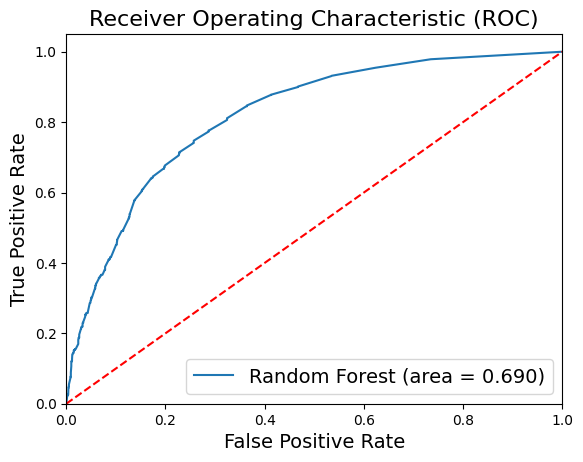

In [21]:
# Building ROC curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.show();

**Interpretation:** The ROC curve is quite near the red line with a 69% chance of correctly distinguishing between Class 1 (Churners) and Class 0 (Non-Churners). This indicates that improvements to the model's  better class separation should be done.

# **SHapley Additive exPlanations (SHAP)**

SHAP (SHapley Additive exPlanations) is a method to explain individual predictions. The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the "payout" (= the prediction) among the features. A player can be an individual feature value, e.g. for tabular data.


In [22]:
# Import the package
import shap
shap.initjs()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


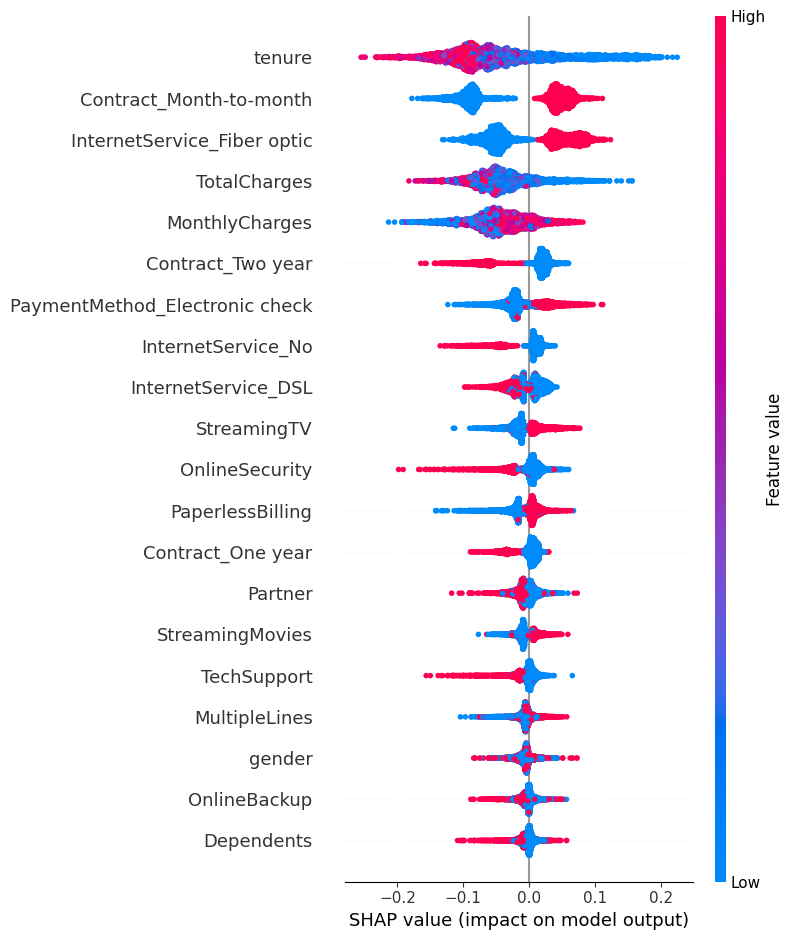

In [23]:
%time
samples = X_train

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[:, :, 1], samples,max_display=20)

The SHAP summary plot above shows the list of top 20 features and their indications of the relationship between the value of a feature and the impact on the classification model.

It suggests that tenure has the highest impact on the model's predictions, followed by other features like Month-to-Month Contract and Fiber Optic Internet Service.

In [24]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):

    '''
    A function for building a SHAP waterfall plot.

    SHAP waterfall plot is used to visualize the most important features in a descending order.

    Parameters:
    shap_values (list): SHAP values obtained from a model
    features (pandas DataFrame): a list of features used in a model
    num_display(int): number of features to display

    Returns:
    matplotlib.pyplot plot: SHAP waterfall plot

    '''

    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]

    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4

    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)

    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))

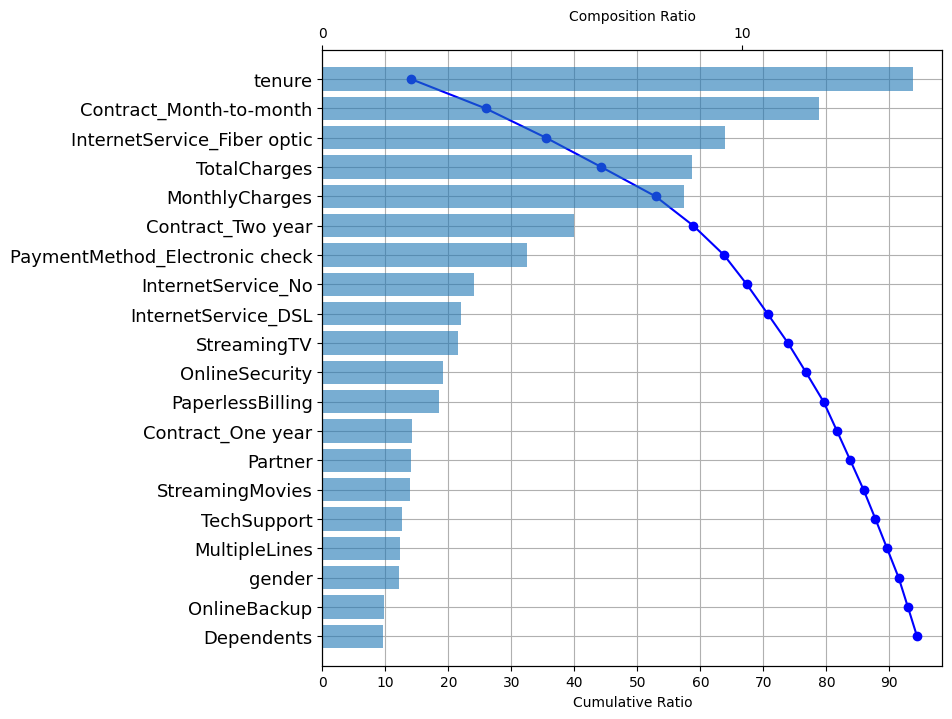

In [25]:
# Shap waterfall plot
make_shap_waterfall_plot(shap_values[:, :, 1], samples)

#changed shap_values[1] to shap_values[:, :, 1]

Based on the SHAP waterfall plot,tenue is the most important feature in the model, which has more than 10% of the model's explainability. Also, these top 20 features provide more than 90% of the model's interpretation.

In [26]:
# Let's have a look on the top features and their dependence plots
top_features = ['tenure', 'Contract_Month-to-month', 'InternetService_Fiber optic', 'TotalCharges']
feature_list = ['MonthlyCharges', 'Contract_Two year', 'PaymentMethod_Electronic check']

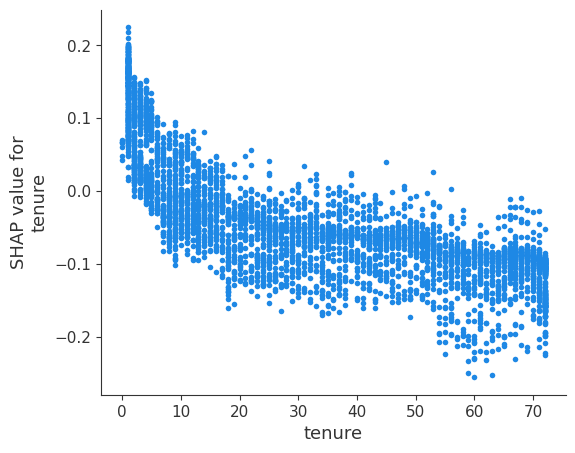

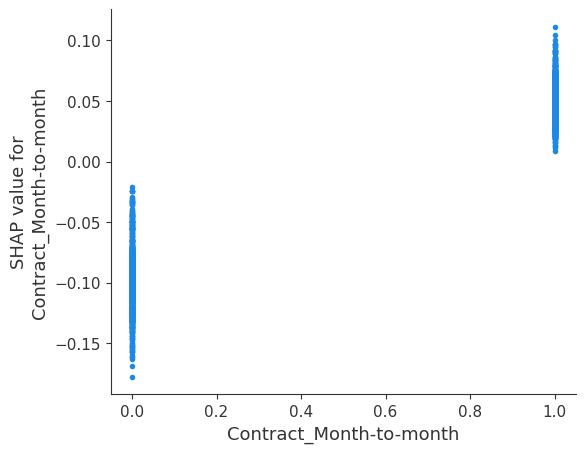

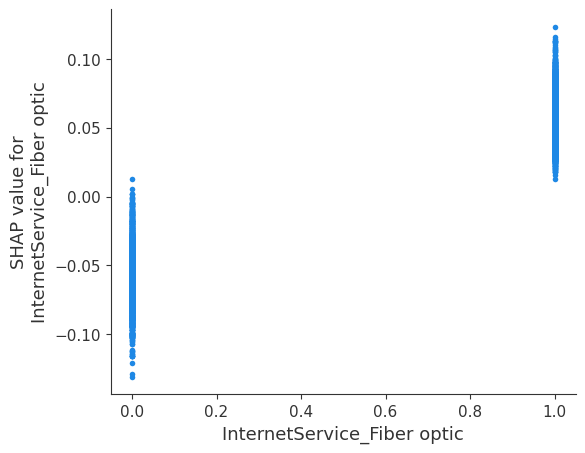

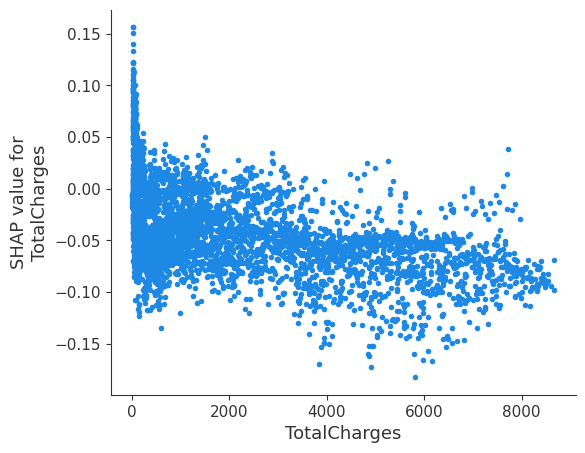

In [27]:
for feature in top_features:
    shap.dependence_plot(feature, shap_values[:, :, 1], samples, interaction_index=None)

Based on the SHAP dependence plots, it is clear that clients, who churned to telco services tend to have the following features (y>0):

- less than 10 months of tenure with the company
- have a month-to-month contract instead of 1-2 years
- internet service provider is fiber optic
- total amount charged to customer is less than 2000

On the other hand, clients, who did NOT churn to the service but remained may have the following features:

- more than 10 months of tenure with the company
- have 1-2 years contract with company
- internet service provider is dsl
- total amount charged to customer is more than 2000

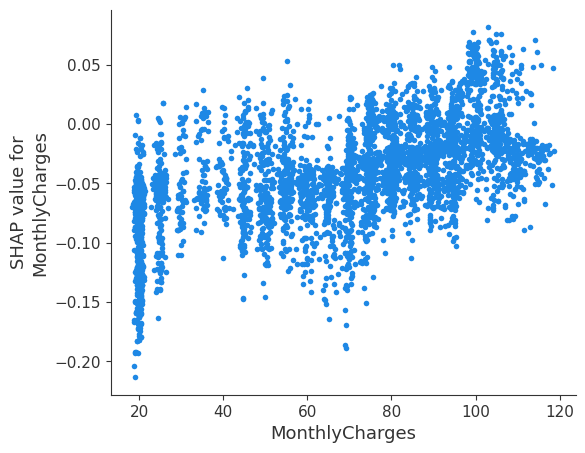

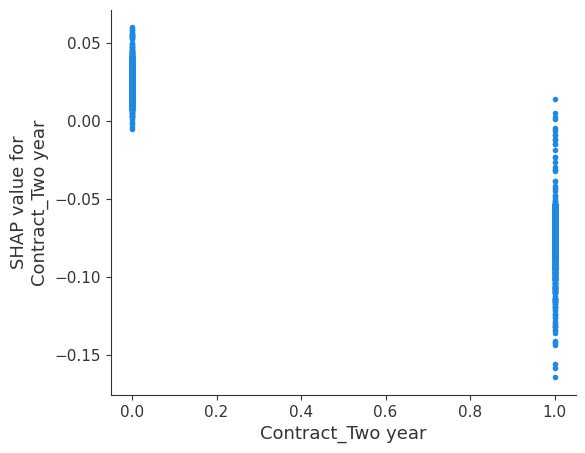

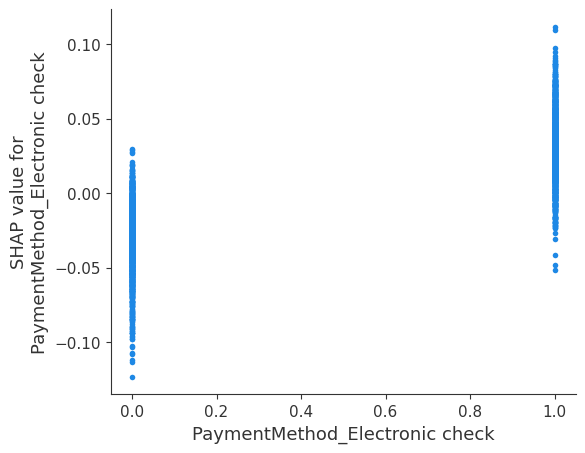

In [28]:
for feature in feature_list:
    shap.dependence_plot(feature, shap_values[:, :, 1], samples, interaction_index=None)

Also looking at the other features we can say that:

- the higher the monthly charge to the customer, the higher the probability to churn on the telco service,
- two-year contracts likely do not lead to churns
- those who paid with electronic checks likely lead to churns

# **Local Interpretable Model-agnostic Explanations (LIME)**

LIME stands for Local Interpretable Model-agnostic Explanations. LIME focuses on training local surrogate models to explain individual predictions.

To identify the top features impacting the model's predictions for a specific instance, we used LIME. By creating a LIME explainer, we examined the contributions of each feature for the selected instance in the test set


In [29]:
#Import Lime Package
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=57e6b245efc82f7f2989798e544813d7b79ee5d0c9491f776718fd0eeb66220b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [30]:
#Create Explainer

# LIME has one explainer for all the models
#explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                 # class_names=['MEDV'], verbose=True, mode='regression')

In [31]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names = X.columns,
                                                   mode = 'classification',
                                                   discretize_continuous=True)

### Select 5th Instance

We selected an instance from the test set (in this case, j = 7) and generated an explanation for its predicted churn probability using the model's probability output.

In [32]:
j = 5
exp = explainer.explain_instance(X_test.values[j], rf.predict_proba, num_features=len(X.columns))

#num_features to tweak number of features shown

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The explanation was displayed in a notebook format, showing a table of feature contributions to the prediction. This helps in understanding which features influence the outcome the most.

In [33]:
# Show the predictions
exp.show_in_notebook(show_table=True)

We converted the explanation into a list format to analyze the contributions numerically and organized it into a DataFrame for easier interpretation.

Finally, we computed the absolute contributions to identify the top five features impacting the prediction.


In [34]:
feature_importances = exp.as_list()

contributions = pd.DataFrame(feature_importances, columns=['Feature', 'Contribution'])

contributions['Absolute_Contribution'] = contributions['Contribution'].abs()

top_contributions = contributions.sort_values(by='Absolute_Contribution', ascending=False).head(5)

top_contributions[['Feature', 'Contribution']]

Feature  Contribution
0      Contract_Month-to-month <= 0.00     -0.079260
1  InternetService_Fiber optic <= 0.00     -0.068187
2             Contract_Two year > 0.00     -0.060883
3              29.00 < tenure <= 55.00     -0.043665
4           InternetService_No <= 0.00      0.035790



Predicted Class:
*   The model predicts that this customer is likely to not churn (97% probability).

Featured Contributions
*  Contract_Month-to-month (<= 0.00) (-0.08): The absence of a month-to-month contract (i.e., the customer is not on a month-to-month contract) decreases the likelihood of churn. Customers with more structured or longer commitments are generally less likely to leave, possibly because they have made a longer-term commitment to the provider or feel more invested in the service.
* InternetService_Fiber optic (<= 0.00) (-0.07): Customers not using fiber optic service (i.e., using a different type of internet service) are less likely to churn, possibly due to the higher perceived quality or speed of the service compared to other types of internet service (e.g., DSL).
* Contract_Two year (> 0.00) (-0.06): Customers with a two-year contract are less likely to churn. This negative contribution suggests that those who are committed to a longer-term contract are generally more loyal and less likely to cancel their service.
* Tenure (29.00 < tenure <= 55.00) (-0.04): Customers with a tenure of 29 to 55 months are less likely to churn. This suggests that customers who have stayed for a moderate amount of time are likely satisfied with the service, and the longer they remain with the company, the more likely they are to stay.
* InternetService_No (<= 0.00) (+0.04): Customers with internet service (value of 0 indicates the presence of internet) show a slightly increased likelihood of churn.




### Select 10th Instance

We selected another instance from the test set (in this case, j = 10) and generated an explanation for its predicted churn probability using the model's probability output.

In [35]:
j = 10
exp = explainer.explain_instance(X_test.values[j], rf.predict_proba, num_features=len(X.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The explanation was displayed in a notebook format, showing a table of feature contributions to the prediction. This helps in understanding which features influence the outcome the most.

In [36]:
exp.show_in_notebook(show_table=True)

We converted the explanation into a list format to analyze the contributions numerically and organized it into a DataFrame for easier interpretation.

Finally, we computed the absolute contributions to identify the top five features impacting the prediction.

In [37]:
feature_importances = exp.as_list()

contributions = pd.DataFrame(feature_importances, columns=['Feature', 'Contribution'])

contributions['Absolute_Contribution'] = contributions['Contribution'].abs()

top_contributions = contributions.sort_values(by='Absolute_Contribution', ascending=False).head(5)

top_contributions[['Feature', 'Contribution']]

Feature  Contribution
0      Contract_Month-to-month <= 0.00     -0.077459
1  InternetService_Fiber optic <= 0.00     -0.070895
2            Contract_Two year <= 0.00      0.057047
3              29.00 < tenure <= 55.00     -0.045099
4           InternetService_No <= 0.00      0.036997



Predicted Class:
*  The model predicts that this customer is likely to not churn
(90% probability).

Feature Contributions:
*   Contract_Month-to-month (<= 0.00) (-0.08): The absence of a month-to-month contract (i.e., the customer is not on a month-to-month contract) decreases the likelihood of churn. Customers with more structured or longer commitments are generally less likely to leave, possibly because they have made a longer-term commitment to the provider or feel more invested in the service.
*   InternetService_Fiber optic (<= 0.00) (-0.07): Customers not using fiber optic service (i.e., using a different type of internet service) are less likely to churn, possibly due to the higher perceived quality or speed of the service compared to other types of internet service (e.g., DSL).
* Contract_Two year (<= 0.00) (+0.06): Customers not on a two-year contract (i.e., they are either on a month-to-month contract or a one-year contract) are more likely to churn. This positive contribution suggests that customers who are not committed to a long-term contract have a higher tendency to leave.
* Tenure (29.00 < tenure <= 55.00) (-0.04): Customers with a tenure of 29 to 55 months are less likely to churn. This suggests that customers who have stayed for a moderate amount of time are likely satisfied with the service, and the longer they remain with the company, the more likely they are to stay.
* InternetService_No (<= 0.00) (+0.04): Customers with internet service (value of 0 indicates the presence of internet) show a slightly increased likelihood of churn.


### Select 109th instance

We selected another instance from the test set (in this case, j = 109) and generated an explanation for its predicted churn probability using the model's probability output.

In [38]:
j = 109
exp = explainer.explain_instance(X_test.values[j], rf.predict_proba, num_features=len(X.columns))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
exp.show_in_notebook(show_table=True)

We converted the explanation into a list format to analyze the contributions numerically and organized it into a DataFrame for easier interpretation.

Finally, we computed the absolute contributions to identify the top five features impacting the prediction.

In [40]:
feature_importances = exp.as_list()

contributions = pd.DataFrame(feature_importances, columns=['Feature', 'Contribution'])

contributions['Absolute_Contribution'] = contributions['Contribution'].abs()

top_contributions = contributions.sort_values(by='Absolute_Contribution', ascending=False).head(5)

top_contributions[['Feature', 'Contribution']]

Feature  Contribution
0                          tenure <= 9.00      0.098114
1  0.00 < Contract_Month-to-month <= 1.00      0.078869
2     InternetService_Fiber optic <= 0.00     -0.073267
3               Contract_Two year <= 0.00      0.062122
4              InternetService_No <= 0.00      0.033750

Predicted Class:
- The model predicts that this customer is likely to churn (79% probability).


Feature Contributions:
- Tenure (<= 9.00) (+0.10): A short tenure (less than or equal to 9 months) increases the likelihood of churn. Customers with a relatively short tenure may not yet be fully committed to the service and are more likely to leave, either due to dissatisfaction or because they haven't yet formed a strong relationship with the provider.
- Contract_Month-to-month (0.00 < Contract_Month-to-month <= 1.00) (+0.08): Being on a month-to-month contract increases the likelihood of churn. Flexible, short-term contracts generally make it easier for customers to switch providers, as they face fewer barriers compared to those on long-term contracts. Customers with this type of arrangement may be less invested and more likely to explore other options.
- InternetService_Fiber optic (<= 0.00) (-0.07): Not having fiber optic service decreases the likelihood of churn. In this case, the customer does not have fiber optic internet, but the contribution is negative.
- Contract_Two year (<= 0.00) (+0.06): Not having a two-year contract (i.e., the customer is either on a month-to-month or one-year contract) increases the likelihood of churn. Customers who are not on long-term contracts are more flexible and might be more likely to leave since they do not have a long-term commitment tying them to the provider. This aligns with the idea that longer contracts tend to reduce churn by increasing customer commitment.
- InternetService_No (<= 0.00) (+0.03): Customers with internet service (value of 0 indicates the presence of internet) show a slightly increased likelihood of churn. This could suggest that the type of internet service matters—those without internet may be more likely to stay, possibly because they don't need the service, whereas those with internet (depending on its quality or type) might be more likely to leave.

# **Partial Dependence Plots (PDP)**

 We can interpret the partial dependence as the expected target response as a function of the input features of interest.

 Due to the limits of human perception, the size of the set of input features of interest must be small (usually, one or two) thus the input features of interest are usually chosen among the most important features.



### One-way PDP

In [41]:
#1 Way Partial Dependence

from sklearn.inspection import PartialDependenceDisplay
from time import time
from sklearn.neural_network import MLPRegressor

# Define and train the model
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)

MLPRegressor()

Computing partial dependence plots...
done in 3.919s


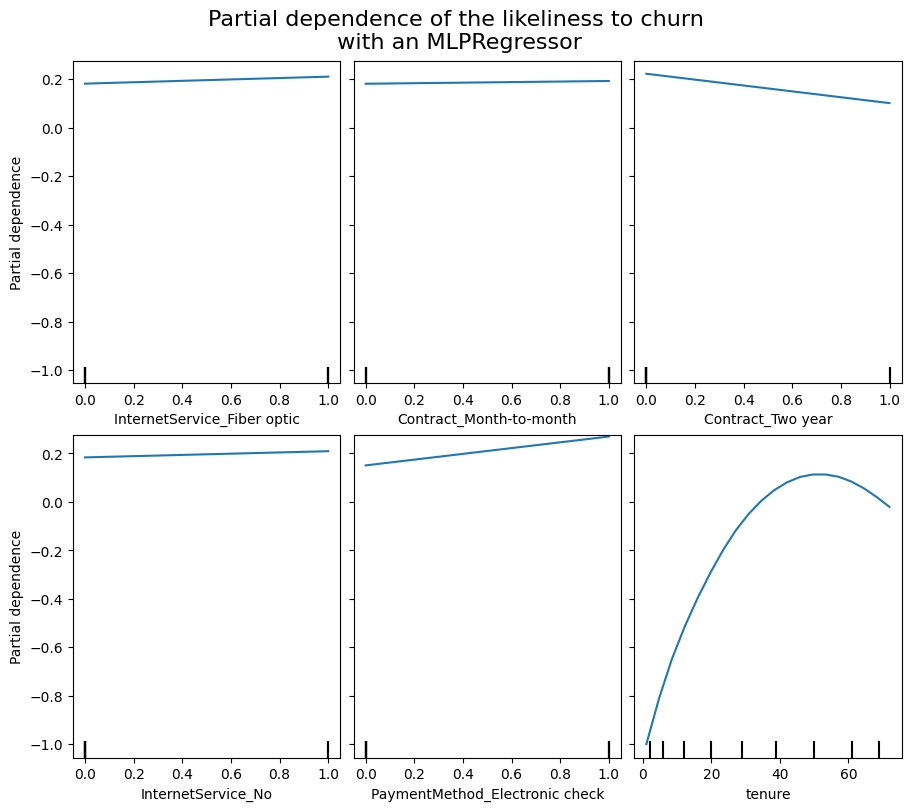

In [42]:
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

print("Computing partial dependence plots...")
features_info = {
    # features of interest
    "features": ["InternetService_Fiber optic", "Contract_Month-to-month", "Contract_Two year", "InternetService_No", "PaymentMethod_Electronic check","tenure"],
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
    "categorical_features": [0,1],
}
tic = time()
_, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    mlp_model,
    X_train,
    **features_info,
    ax=ax,
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle(
    (
        "Partial dependence of the likeliness to churn\n"
        " with an MLPRegressor"
    ),
    fontsize=16,
)

Generally, PDP assists in understanding how a specific feature influences a model’s predictions. In this case, it analyzes the feature’s impact on churn likelihood.

- For internet service_fiber optic, the more customers have fiber optic internet, the churn likelihood tends to increase, suggesting that customers with fiber optic internet may be more likely to churn.
- For contract_month-to-month, a higher proportion of customers with month-to-month contracts correlates with a higher churn likelihood, possibly suggesting that customers without long-term contracts are more likely to churn.
- For contract_two year, as the proportion of customers with two-year contracts increases, the churn likelihood increases, which may indicate that long-term contracts could possibly lead to churn.
- For internet service_no, a higher proportion of customers without internet service correlates with a lower churn likelihood, which may be due to various reasons, including lower usage or specific demographics of these customers.
- For payment method_electronic check, a higher proportion of customers using electronic checks is associated with a higher churn likelihood. This may be due to customers opting for convenience or reducing payment issues.
- For tenure, the clear downward sloping line in the PDP for tenure indicates a negative correlation between tenure and churn probability. As tenure increases, the probability of churn decreases, which may be interpreted as longer-term customers being more likely to stay with the service provider.

### Two-way PDP

In [43]:
# Two-way Partial Dependence Plots
two_way_features = [('TotalCharges', 'tenure'), ('tenure', 'MonthlyCharges')]

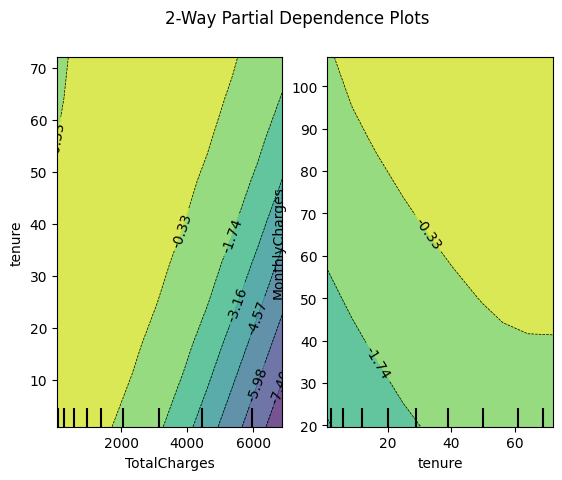

In [44]:
PartialDependenceDisplay.from_estimator(
    mlp_model, X_train, features=two_way_features, grid_resolution=10
)
plt.suptitle("2-Way Partial Dependence Plots")
plt.show()

Subsequently, the two-way partial dependence plots represent the interactions among the two input features of interest. Generally, the darker regions may indicate higher predicted probabilities of churn, and lighter regions for lower predicted probabilities. For the first plot showing tenure and total charges, as both TotalCharges and Tenure increase, churn probability tends to decrease, which may suggest that longer-term customers with higher total charges are less likely to churn. A specific case may be that a higher total charges may have a greater impact on reducing churn for customers with shorter tenures. Meanwhile, for the second plot showing tenure and monthly charges, it may be possible that higher monthly charges might have a more significant impact on churn for shorter tenures.

# **Top Features Impacting Model's Predictions**

Basically, each model has various perspectives on identifying feature importance. For SHAP, the feature importance plot, SHAP summary plot, and SHAP force plot visualizes how the SHAP values rank each feature whether through higher values or wider distribution, highlighting either positive or negative impacts. For LIME, it explains individual predictions, specifically how the weights assigned to features in the local model indicate their relative importance for that specific prediction. For PDP, the plots represent how the features with steeper slopes or more pronounced curves may have a stronger impact on the model's predictions.

Therefore, to identify the top features, we consider numerous insights. One of which would be the features that consistently rank high in significance across all three methods are likely to be influential. Alongside this, the direction of the impact of these features, may it be positive SHAP values or increasing trends in PDP may indicate a positive influence on churn, whereas negative values or decreasing trends would represent a negative impact.

With all of these being said, the following sections expound on which top features were identified that impacted the model's predictions most significantly.

# **Key Insights For Each Method**

### **SHAP**
- Significant Features: Tenure, Contract_Month-to-month, InternetService_Fiber optic, TotalCharges

The SHAP analysis revealed that clients who are more likely to churn typically have a tenure of less than 10 months, suggesting that newer customers may not yet be fully committed to the service. Customers on month-to-month contracts are also more likely to leave, as flexible, short-term arrangements make it easier for them to switch providers. Additionally, fiber optic internet users tend to have a higher likelihood of churning, which could indicate that fiber optic customers are more demanding in terms of service quality or have more competitive alternatives available. Finally, TotalCharges under $2,000 is linked with a higher probability of churn, which implies that customers who have spent less over time, possibly due to lower-tier plans or shorter subscriptions, are more likely to cancel.

### **LIME**
- Significant Features: Contract_Month-to-month, Tenure, Contract_Two year, InternetService_Fiber optic

The LIME analysis showed that contract type, tenure, and internet service are key in deciding if a customer will churn or not. It highlighted that customers on month-to-month contracts are more likely to leave, while those on two-year contracts are less likely to churn. Tenure also plays a big role, with customers who have been with the company for a longer time being more likely to stay. Additionally, the type of internet service was important—customers not using Fiber optic internet service were less likely to churn. These findings align with what is understood in the industry, where contract flexibility, customer loyalty (as measured by tenure), and the quality of service (such as fast internet) are key factors in retention.

### **PDP**
- Significant Features: Tenure, Contract_Two year, InternetService_No, InternetService_Fiber optic

Analyzing the PDP results, the significant factors influencing customer churn and insights are as follows. It was seen that longer tenure and two-year contracts significantly reduce churn, highlighting the importance of customer retention and long-term commitments. Interestingly, customers without internet service also exhibit lower churn rates, potentially due to certain demographics or lower usage. On the other hand, fiber optic internet customers have a higher possibility to churn, suggesting the need for improved service quality and customer support for this case.



# **Summary of Findings**

In general, the results were in line with what we would expect based on our understanding of customer behavior in the Telco industry. Across methods, the most influential features include Contract Type, Tenure, and Internet Service Type. However, one feature that stood out, but wasn't entirely surprising, was fiber optic internet service. While it had a smaller impact compared to contract type and tenure, it was still an important contributor to predicting churn. This shows that internet quality plays a bigger role in customer retention than we might sometimes realize. Even though other factors like contract length and tenure are important, the value customers place on reliable, high-speed internet can make a real difference in their decision to stay with a provider.

Overall, the analysis of SHAP, LIME, and PDP results has truly provided valuable insights into the factors influencing customer churn in the telecommunications industry. Throughout the results, it was seen that customers with shorter tenures, month-to-month contracts, fiber optic internet service, and lower total charges may be more likely to churn. On the other hand, customers with longer tenures, longer-term contracts, non-fiber optic internet service, and higher total charges tend to be more loyal. Therefore, these findings may align with industry knowledge and expectations, as it highlights the importance of customer retention strategies, contract flexibility, and service quality. Specifically, maintaining high-quality service for fiber optic customers and encouraging longer-term contracts may significantly reduce churn rates. Indeed, these models help deepen our understanding of how important features impact churn, which may, in turn, be beneficial in understanding real-world business scenarios.


